In [28]:
from kan.utils import create_dataset
import torch
import matplotlib.pyplot as plt
f = lambda x: torch.sin(2 * torch.pi * x[:, [0]]) * torch.exp(-x[:, [1]] ** 2) + 0.5 * x[:, [1]] ** 3

dataset = create_dataset(f, n_var=2, ranges=[-0.9, 0.9])

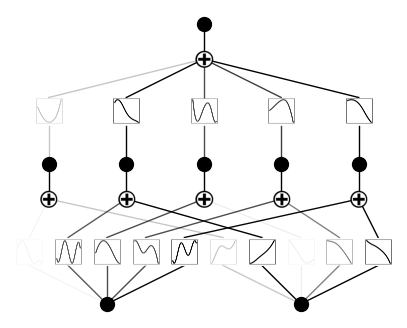

In [29]:
model(dataset['train_input']);
model.plot()

In [30]:
model.fit(dataset, steps=1000)

| train_loss: 4.51e-03 | test_loss: 4.72e-03 | reg: 1.84e+01 | : 100%|█| 1000/1000 [00:47<00:00, 21.


saving model version 0.4


{'train_loss': [array(0.00834565, dtype=float32),
  array(0.00810116, dtype=float32),
  array(0.00790802, dtype=float32),
  array(0.00764174, dtype=float32),
  array(0.00758151, dtype=float32),
  array(0.00760549, dtype=float32),
  array(0.00746762, dtype=float32),
  array(0.00742262, dtype=float32),
  array(0.00739086, dtype=float32),
  array(0.00735492, dtype=float32),
  array(0.00735418, dtype=float32),
  array(0.00732799, dtype=float32),
  array(0.00730964, dtype=float32),
  array(0.00729092, dtype=float32),
  array(0.00726735, dtype=float32),
  array(0.00720165, dtype=float32),
  array(0.00715605, dtype=float32),
  array(0.00710825, dtype=float32),
  array(0.00706504, dtype=float32),
  array(0.00703092, dtype=float32),
  array(0.00705572, dtype=float32),
  array(0.0069888, dtype=float32),
  array(0.00694739, dtype=float32),
  array(0.00688527, dtype=float32),
  array(0.00682222, dtype=float32),
  array(0.0069608, dtype=float32),
  array(0.00689247, dtype=float32),
  array(0.006863

In [31]:
X_test, y_test = dataset['test_input'], dataset['test_label']

with torch.no_grad():
    y_pred = model(X_test)

# Mean Squared Error
mse = torch.mean((y_pred - y_test) ** 2).item()
print(f"Test MSE: {mse:.6f}")

Test MSE: 0.000022


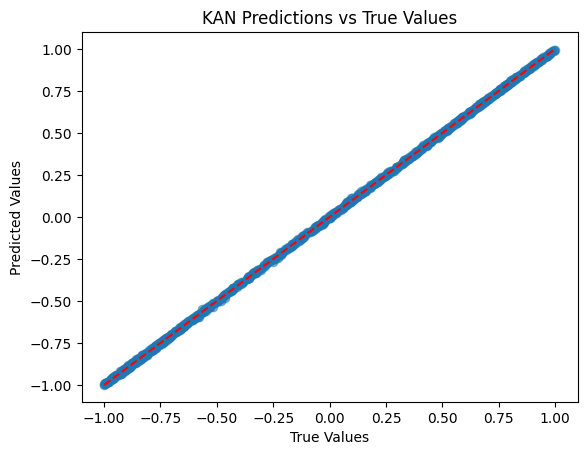

In [32]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("KAN Predictions vs True Values")
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--')  # Perfect prediction line
plt.show()
